# Data Analysis 3 - Assignment 1

## Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
import os
from plotnine import *
import numpy as np
import sys
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer import stargazer
from statsmodels.tools.eval_measures import mse,rmse


In [2]:
# Current script and repository folder
current_path = os.getcwd()
repository_path = current_path.split('DA3-A1')[0]

In [3]:
# Add utils folder to sys path 
# Note: os.path.join() creates a string with the right syntax for defining a path for your operating sytem.
sys.path.append(os.path.join(repository_path, 'utils'))

In [4]:
# Define data folder
data_path = os.path.join(repository_path, 'data')

In [5]:
# Import the prewritten helper functions
from py_helper_functions import *

In [6]:
# DATA IMPORT - FROM FILE
data_all = pd.read_csv(os.path.join(data_path, 'morg-2014-emp.csv'))

In [7]:
# DATA IMPORT - FROM GITHUB
#data_all = pd.read_csv('https://raw.githubusercontent.com/mateschieszler/data/main/morg/morg-2014-emp.csv')

In [8]:
data_all.head()

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
1,5,75680310997590,January,AL,3457.1138,450.00,40,41,2,NaN,...,2,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent
2,6,75680310997590,January,AL,3936.9110,1090.00,60,41,2,NaN,...,2,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work
3,10,179140131100930,January,AL,3288.3640,769.23,40,40,1,NaN,...,2,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work
4,11,179140131100930,January,AL,3422.8500,826.92,40,43,1,NaN,...,2,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work


In [127]:
# filtering for usual hours between 20 and 60
data_all = data_all.query("uhours>=20 & uhours<=60")

In [128]:
code = 2100 # lawyers
data_all.loc[data_all["occ2012"] == code]

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,state,ind02,occ2012,class,unionmme,unioncov,lfsr94,w,lnw,agesq
23,45,960021970039060,January,AL,3811.7857,1442.30,50,45,1,NaN,...,63,Legal services (5411),2100,"Private, For Profit",No,No,Employed-At Work,28.846000,3.361971,3249
295,656,235004820400137,January,AZ,3434.7076,1384.61,40,44,1,NaN,...,86,"Justice, public order, and safety activities (...",2100,Government - Federal,No,No,Employed-At Work,34.615250,3.544294,3844
659,1489,97977400095618,January,CA,3166.3863,2307.00,50,46,1,NaN,...,93,Legal services (5411),2100,"Private, For Profit",No,No,Employed-At Work,46.140000,3.831680,2209
764,1729,435002800600122,January,CA,3060.5871,700.00,50,45,1,NaN,...,93,"Accounting, tax preparation, bookkeeping, and ...",2100,"Private, For Profit",No,No,Employed-At Work,14.000000,2.639057,841
901,1996,700609983456587,January,CA,3057.3628,2884.61,50,46,1,NaN,...,93,Investigation and security services (5616),2100,"Private, For Profit",No,No,Employed-At Work,57.692200,4.055122,3025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148753,315864,1244006650301,December,WV,649.2498,800.00,40,45,1,NaN,...,5,Legal services (5411),2100,"Private, For Profit",No,No,Employed-At Work,20.000000,2.995732,2500
148773,315914,108415040044617,December,WV,591.4034,1105.76,35,44,1,NaN,...,5,"Justice, public order, and safety activities (...",2100,Government - State,No,No,Employed-At Work,31.593143,3.452940,2704
149009,316461,369590869500970,December,WI,2178.9901,961.53,40,45,1,NaN,...,3,Legal services (5411),2100,"Private, For Profit",No,No,Employed-At Work,24.038250,3.179646,900
149147,316709,31036591500581,December,WY,319.0023,865.38,40,45,1,NaN,...,8,Legal services (5411),2100,"Private, For Profit",No,No,Employed-At Work,21.634500,3.074289,1444


In [129]:
data_all["w"] = data_all["earnwke"] / data_all["uhours"] # hourly wage
data_all["lnw"] = np.log(data_all["w"]) #log hourly wage
data_all["agesq"] = np.power(data_all["age"], 2) # age squared

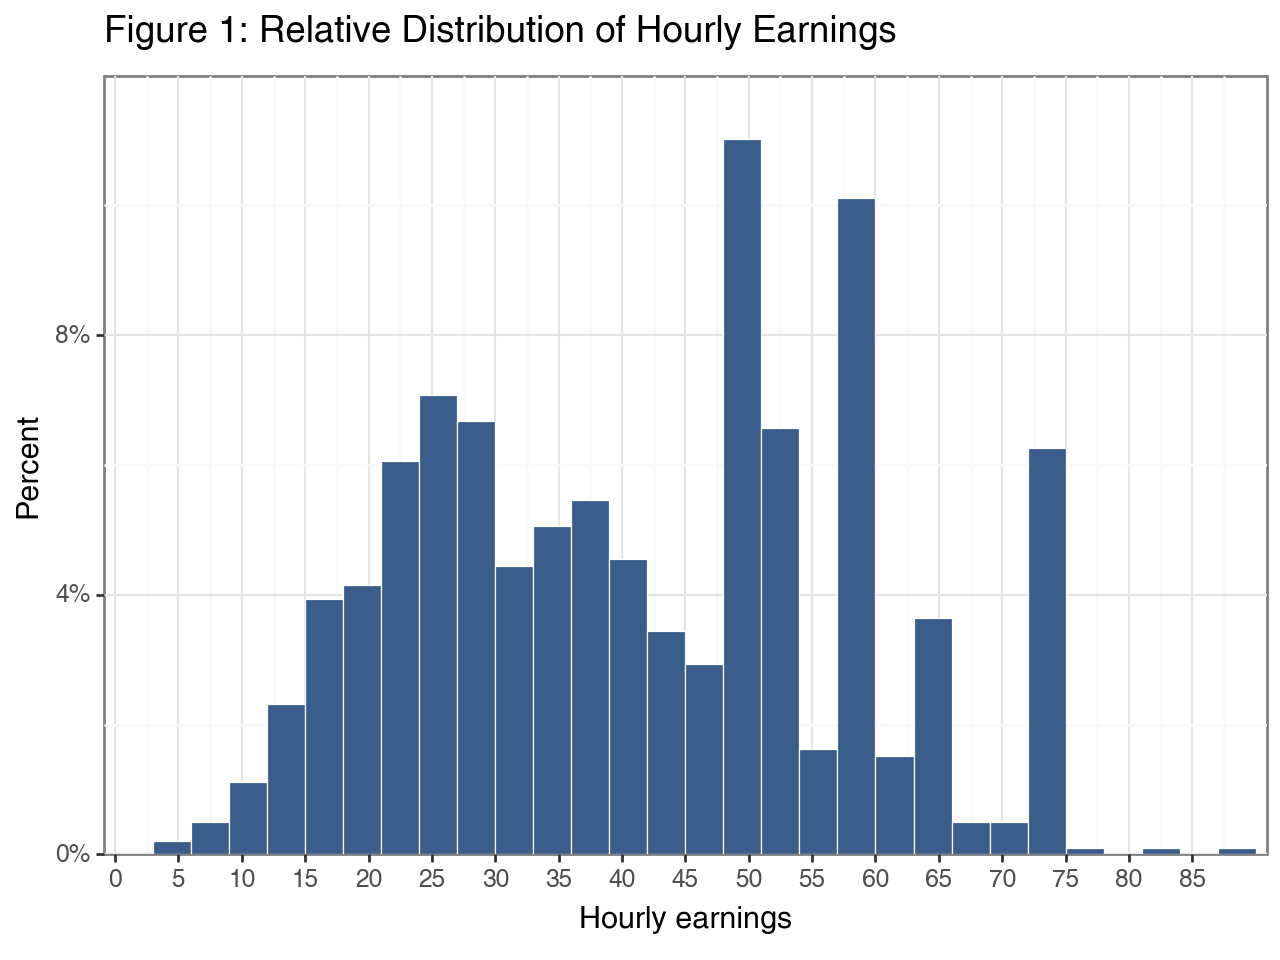

<Figure Size: (640 x 480)>

In [120]:
# Plot the relative distribution of hourly earnings 
(
    ggplot(data_all.loc[data_all["occ2012"] == code], aes(x="w", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=3,
        boundary=0,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Hourly earnings", y="Percent", title="Figure 1: Relative Distribution of Hourly Earnings")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 90), breaks=seq(0, 90, 5))
    + scale_y_continuous(
        labels=percent_format(), #mizani
        breaks=seq(0, 0.12, 0.04),
        limits=(0, 0.12),
        expand=(0.0, 0.0),
    )
    + theme_bw()
)

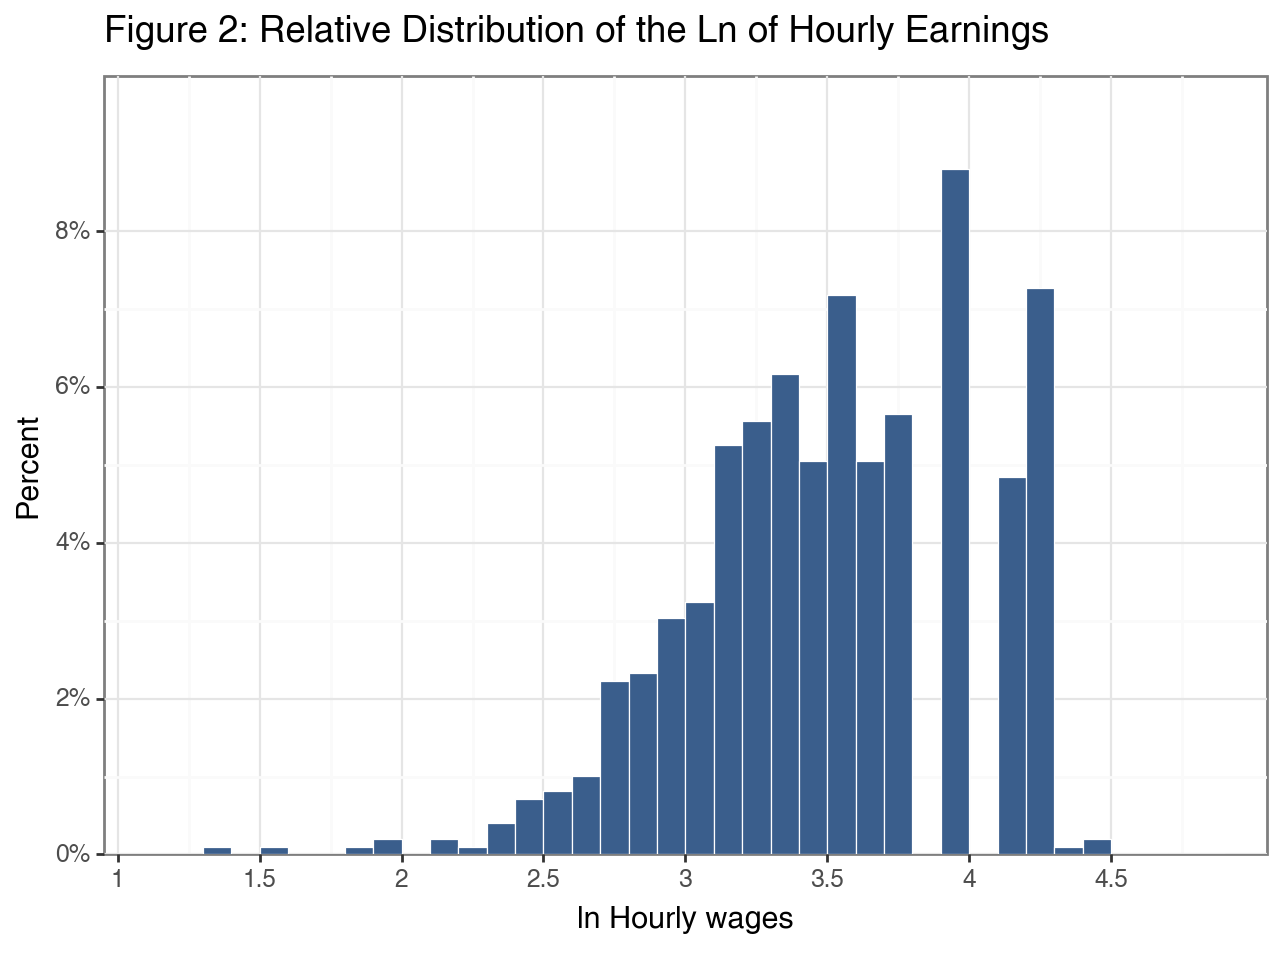

<Figure Size: (640 x 480)>

In [14]:
# Plot the relative distribution of the ln of hourly earnings 
(
    ggplot(data_all.loc[data_all["occ2012"] == code], aes(x="lnw", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=0.1,
        boundary=0,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="ln Hourly wages", y="Percent",title="Figure 2: Relative Distribution of the Ln of Hourly Earnings")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 5, 0.5))
    + scale_y_continuous(
        expand=(0.0, 0.0),
        limits=(0, 0.1),
        breaks=seq(0, 0.1, 0.02),
        labels=percent_format(), #mizani
    )
    + theme_bw()
)

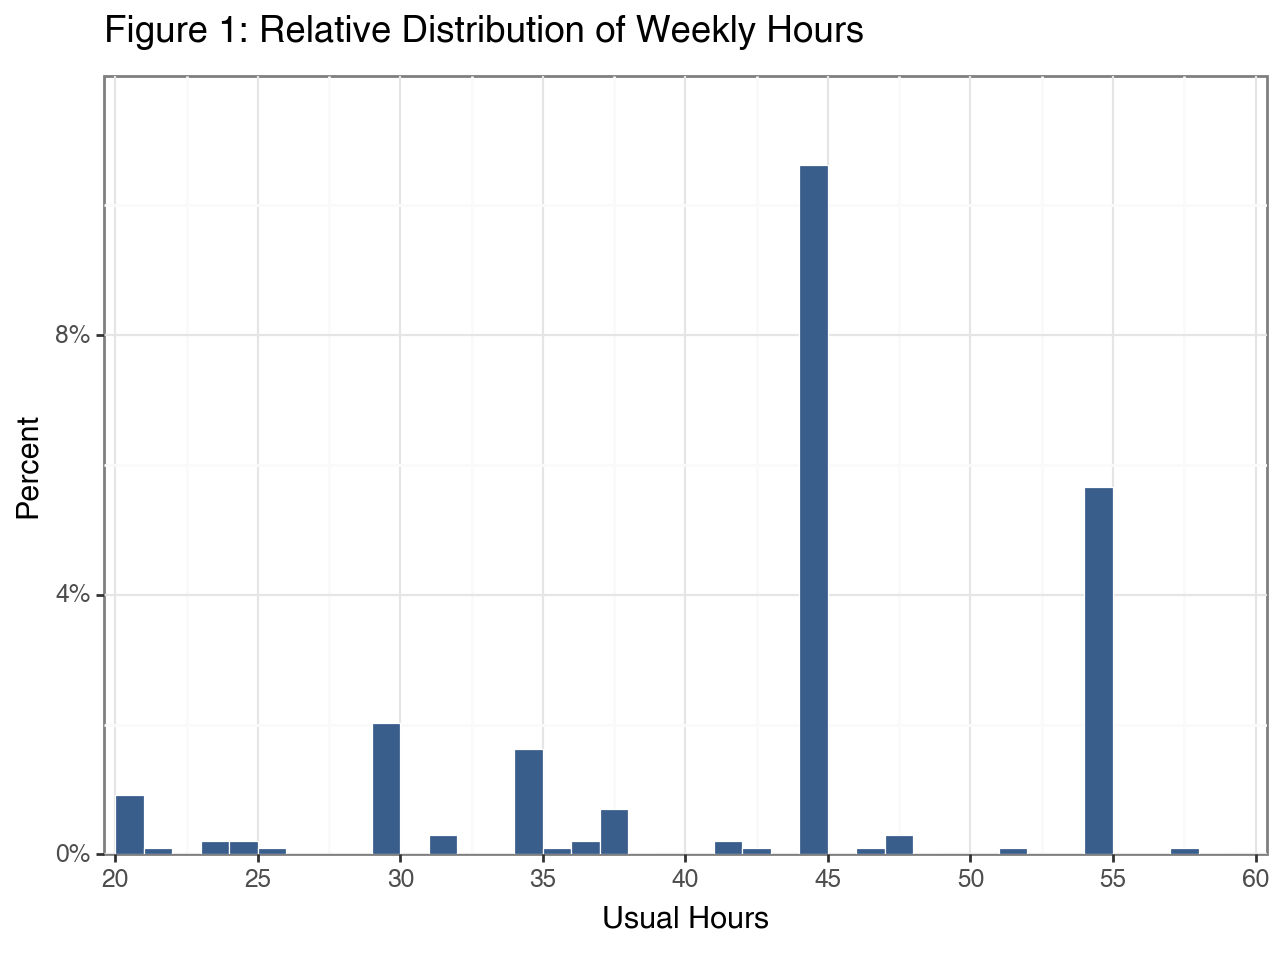

<Figure Size: (640 x 480)>

In [71]:
# Plot the relative distribution of hourly earnings 
(
    ggplot(data_all.loc[data_all["occ2012"] == code], aes(x="uhours", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=1,
        boundary=0,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Usual Hours", y="Percent", title="Figure 1: Relative Distribution of Weekly Hours")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(20, 60), breaks=seq(0, 90, 5))
    + scale_y_continuous(
        labels=percent_format(), #mizani
        breaks=seq(0, 0.12, 0.04),
        limits=(0, 0.12),
        expand=(0.0, 0.0),
    )
    + theme_bw()
)

In [16]:
data = data_all.loc[data_all["occ2012"] == code]

In [17]:
data.shape

(989, 26)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 23 to 149295
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  989 non-null    int64  
 1   hhid        989 non-null    int64  
 2   intmonth    989 non-null    object 
 3   stfips      989 non-null    object 
 4   weight      989 non-null    float64
 5   earnwke     989 non-null    float64
 6   uhours      989 non-null    int64  
 7   grade92     989 non-null    int64  
 8   race        989 non-null    int64  
 9   ethnic      45 non-null     float64
 10  age         989 non-null    int64  
 11  sex         989 non-null    int64  
 12  marital     989 non-null    int64  
 13  ownchild    989 non-null    int64  
 14  chldpres    989 non-null    int64  
 15  prcitshp    989 non-null    object 
 16  state       989 non-null    object 
 17  ind02       989 non-null    object 
 18  occ2012     989 non-null    int64  
 19  class       989 non-null 

In [19]:
data.columns

Index(['Unnamed: 0', 'hhid', 'intmonth', 'stfips', 'weight', 'earnwke',
       'uhours', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital',
       'ownchild', 'chldpres', 'prcitshp', 'state', 'ind02', 'occ2012',
       'class', 'unionmme', 'unioncov', 'lfsr94', 'w', 'lnw', 'agesq'],
      dtype='object')

In [130]:
#columns to be used for modeling
# 'earnwke', 'uhours', 'grade92', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital', 'ownchild', 'chldpres', 'prcitshp' , 'state', 'class', 'unionmme', 'unioncov', 'agesq'

In [21]:
# Manage missing
# data["earnwke"] = data["earnwke"].fillna("Missing") # traget variable
# data["uhours"] = data["uhours"].fillna("Missing") # not used
data["grade92"] = data["grade92"].fillna("Missing") # level of education
data["race"] = data["race"].fillna("Missing") # race
# data["ethnic"] = data["ethnic"].fillna("Missing") # Hispanic community sub-division
data["age"] = data["age"].fillna("Missing") # age
data["sex"] = data["sex"].fillna("Missing") # sex
data["marital"] = data["marital"].fillna("Missing") # marital status
data["ownchild"] = data["ownchild"].fillna("Missing") # number of children
data["chldpres"] = data["chldpres"].fillna("Missing") # children in the household
# data["state"] = data["state"].fillna("Missing") # state, not used
data["class"] = data["class"].fillna("Missing") # classification
data["unionmme"] = data["unionmme"].fillna("Missing") # union membership
data["unioncov"] = data["unioncov"].fillna("Missing") # union coverage

In [22]:
# check frequency by level of education
freq = data.groupby("grade92").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
grade92,,,
33,1,0.101,0.101
38,1,0.101,0.202
39,10,1.011,1.213
40,7,0.708,1.921
41,2,0.202,2.123
42,6,0.607,2.730
43,28,2.831,5.561
44,55,5.561,11.122
45,696,70.374,81.496


In [23]:
# check frequency by race
freq = data.groupby("race").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
race,,,
1,864,87.361,87.361
2,56,5.662,93.023
3,5,0.506,93.529
4,49,4.954,98.483
6,1,0.101,98.584
7,3,0.303,98.887
8,9,0.910,99.797
10,1,0.101,99.898
11,1,0.101,99.999


In [24]:
# check frequency by ethnicity
freq = data.groupby("ethnic").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
ethnic,,,
1.0,20,44.444,44.444
2.0,5,11.111,55.555
3.0,4,8.889,64.444
4.0,1,2.222,66.666
5.0,2,4.444,71.110
6.0,1,2.222,73.332
7.0,5,11.111,84.443
8.0,7,15.556,99.999


In [25]:
# check frequency by sex
freq = data.groupby("sex").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
sex,,,
1,593,59.96,59.96
2,396,40.04,100.00


In [26]:
# check frequency by marital status
freq = data.groupby("marital").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
marital,,,
1,650,65.723,65.723
2,3,0.303,66.026
3,11,1.112,67.138
4,7,0.708,67.846
5,66,6.673,74.519
6,10,1.011,75.530
7,242,24.469,99.999


In [72]:
# check frequency by number of children
freq = data.groupby("ownchild").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
ownchild,,,
0,574,58.038,58.038
1,138,13.953,71.991
2,203,20.526,92.517
3,58,5.865,98.382
4,15,1.517,99.899
5,1,0.101,100.000


In [28]:
# check frequency by sex
freq = data.groupby("chldpres").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
chldpres,,,
0,574,58.038,58.038
1,50,5.056,63.094
2,22,2.224,65.318
3,115,11.628,76.946
4,53,5.359,82.305
5,47,4.752,87.057
6,4,0.404,87.461
8,45,4.550,92.011
9,1,0.101,92.112


In [29]:
# check frequency by citizenship
freq = data.groupby("prcitshp").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
prcitshp,,,
"Foreign Born, Not a US Citizen",14,1.416,1.416
"Foreign Born, US Cit By Naturalization",35,3.539,4.955
"Native, Born Abroad Of US Parent(s)",10,1.011,5.966
"Native, Born In US",926,93.630,99.596
"Native, Born in PR or US Outlying Area",4,0.404,100.000


In [73]:
# check frequency by employment type
freq = data.groupby("class").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
class,,,
Government - Federal,124,12.538,12.538
Government - Local,85,8.595,21.133
Government - State,101,10.212,31.345
"Private, For Profit",631,63.802,95.147
"Private, Nonprofit",48,4.853,100.000


In [74]:
# check frequency by union membership
freq = data.groupby("unionmme").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
unionmme,,,
No,932,94.237,94.237
Yes,57,5.763,100.000


In [75]:
# check frequency by union coverage
freq = data.groupby("unioncov").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
unioncov,,,
Missing,57,5.763,5.763
No,903,91.304,97.067
Yes,29,2.932,99.999


## Feature engineering

In [33]:
# sex
data["female"] = (data.sex == 2).astype(int) #dummy

In [34]:
# highest grade completed dummies
data["ed_other"] = np.where((data["grade92"].isin([44, 45, 46])), 0, 1)
data["ed_MA"] = (data["grade92"] == 44).astype(int)
data["ed_Pro"] = (data["grade92"] == 45).astype(int)
data["ed_Phd"] = (data["grade92"] == 46).astype(int)

In [35]:
# ethnicity dummies
data["white"] = (data["race"] == 1).astype(int)
data["afram"] = (data["race"] == 2).astype(int)
data["asian"] = (data["race"] == 4).astype(int)
data["hisp"] = (data["ethnic"].notna()).astype(int)
data["othernonw"] = (
    (data["white"] == 0) & (data["afram"] == 0) & (data["asian"] == 0) & (data["hisp"] == 0)
).astype(int) #other nonwhite
# citizenship
data["nonUSborn"] = (
    (data["prcitshp"] == "Foreign Born, US Cit By Naturalization")
    | (data["prcitshp"] == "Foreign Born, Not a US Citizen")
).astype(int)

In [36]:
# Potentially endogeneous demographics
data["married"] = ((data["marital"] == 1) | (data["marital"] == 2)).astype(int)
data["divorced"] = ((data["marital"] == 3) | (data["marital"] == 5)).astype(int)
data["wiwowed"] = (data["marital"] == 4).astype(int)
data["nevermar"] = (data["marital"] == 7).astype(int)

data["child0"] = (data["chldpres"] == 0).astype(int)
data["child1"] = (data["chldpres"] == 1).astype(int)
data["child2"] = (data["chldpres"] == 2).astype(int)
data["child3"] = (data["chldpres"] == 3).astype(int)
data["child4pl"] = (data["chldpres"] >= 4).astype(int)

# Work-related variables
data["fedgov"] = (data["class"] == "Government - Federal").astype(int)
data["stagov"] = (data["class"] == "Government - State").astype(int)
data["locgov"] = (data["class"] == "Government - Local").astype(int)
data["nonprof"] = (data["class"] == "Private, Nonprofit").astype(int)
data["forprof"] = (data["class"] == "Private, For Profit").astype(int)
data["union"] = ((data["unionmme"] == "Yes") | (data["unioncov"] == "Yes")).astype(int)

In [37]:
# data summary
data[[
    "age",
    "agesq",
    "female",
    "ed_other",
    "ed_MA",
    "ed_Pro",
    "ed_Phd",
    "white",
    "afram",
    "asian",
    "hisp",
    "othernonw",
    "nonUSborn",
    "married",
    "divorced",
    "wiwowed",
    "nevermar",
    "child0",
    "child1",
    "child2",
    "child3",
    "child4pl",
    "fedgov",
    "stagov",
    "locgov",
    "nonprof",
    "forprof",
    "union",
    ]].describe().T

,count,mean,std,min,25%,50%,75%,max
age,989.0,43.161780,10.905191,21.0,34.0,43.0,53.0,64.0
agesq,989.0,1981.742164,971.713979,441.0,1156.0,1849.0,2809.0,4096.0
female,989.0,0.400404,0.490228,0.0,0.0,0.0,1.0,1.0
ed_other,989.0,0.055612,0.229286,0.0,0.0,0.0,0.0,1.0
ed_MA,989.0,0.055612,0.229286,0.0,0.0,0.0,0.0,1.0
ed_Pro,989.0,0.703741,0.456838,0.0,0.0,1.0,1.0,1.0
ed_Phd,989.0,0.185035,0.388523,0.0,0.0,0.0,0.0,1.0
white,989.0,0.873610,0.332457,0.0,1.0,1.0,1.0,1.0
afram,989.0,0.056623,0.231237,0.0,0.0,0.0,0.0,1.0
asian,989.0,0.049545,0.217113,0.0,0.0,0.0,0.0,1.0


In [38]:
# For certain charts, we need to sort values by age

data.sort_values(by = 'age', inplace = True)

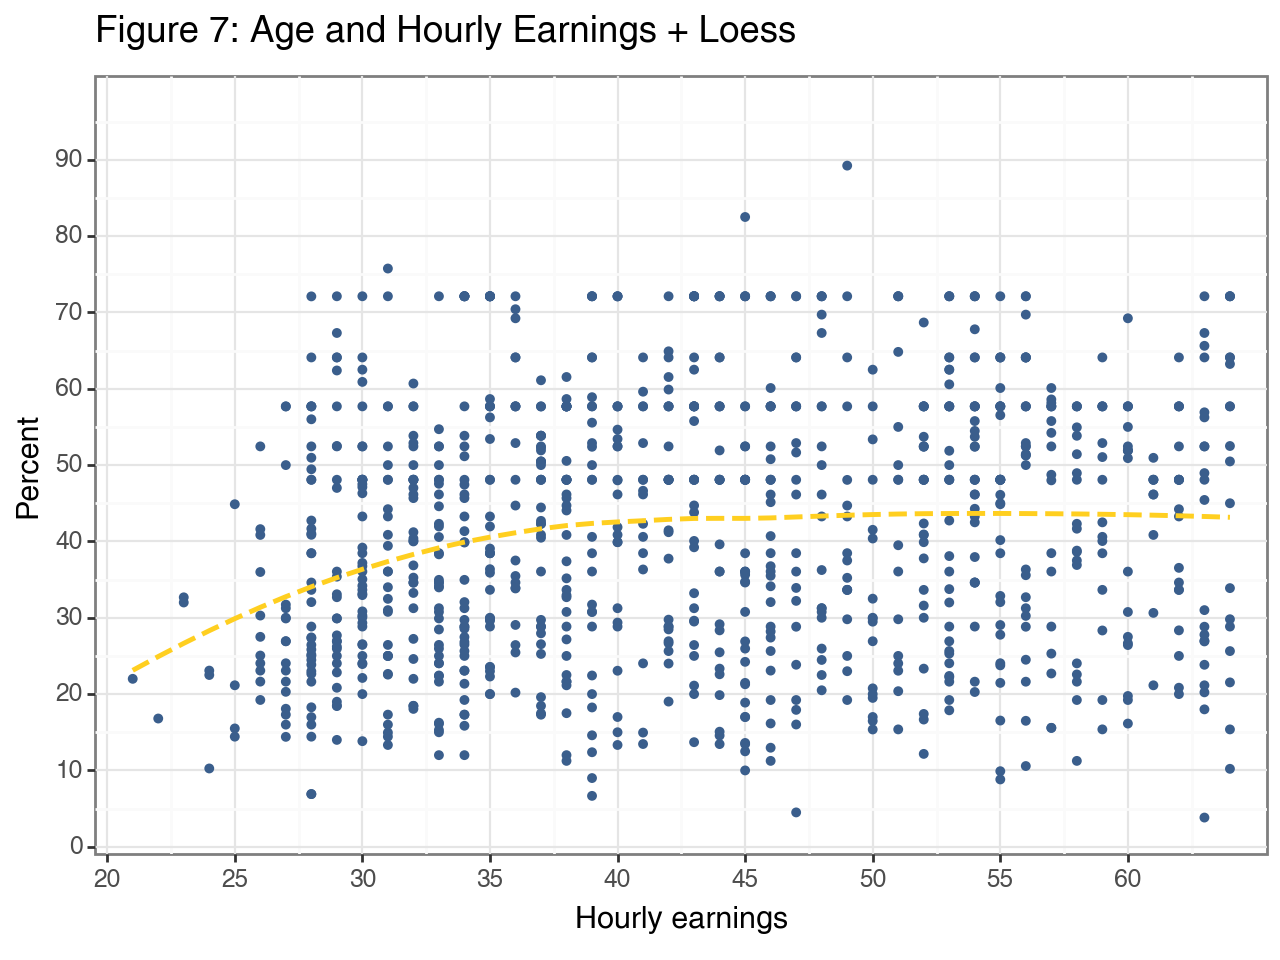

<Figure Size: (640 x 480)>

In [122]:
#lowess with ggplot
ggplot(data, aes(x="age", y="w")) + geom_point(
    color=color[0], size=1, alpha=0.8, show_legend=False, na_rm=True
) + geom_smooth(method="loess", se=False, colour=color[3],linetype="dashed", size=1, span=0.9) + labs(
    x="Age (years)", y="Wage (US dollars)"
) + theme_bw() + expand_limits(
    x=0.01, y=0.01
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 100), breaks=seq(0, 100, 10)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(20, 65), breaks=seq(20, 65, 5)
) + labs(x="Hourly earnings", y="Percent", title="Figure 7: Age and Hourly Earnings + Loess")

In [44]:
%matplotlib inline

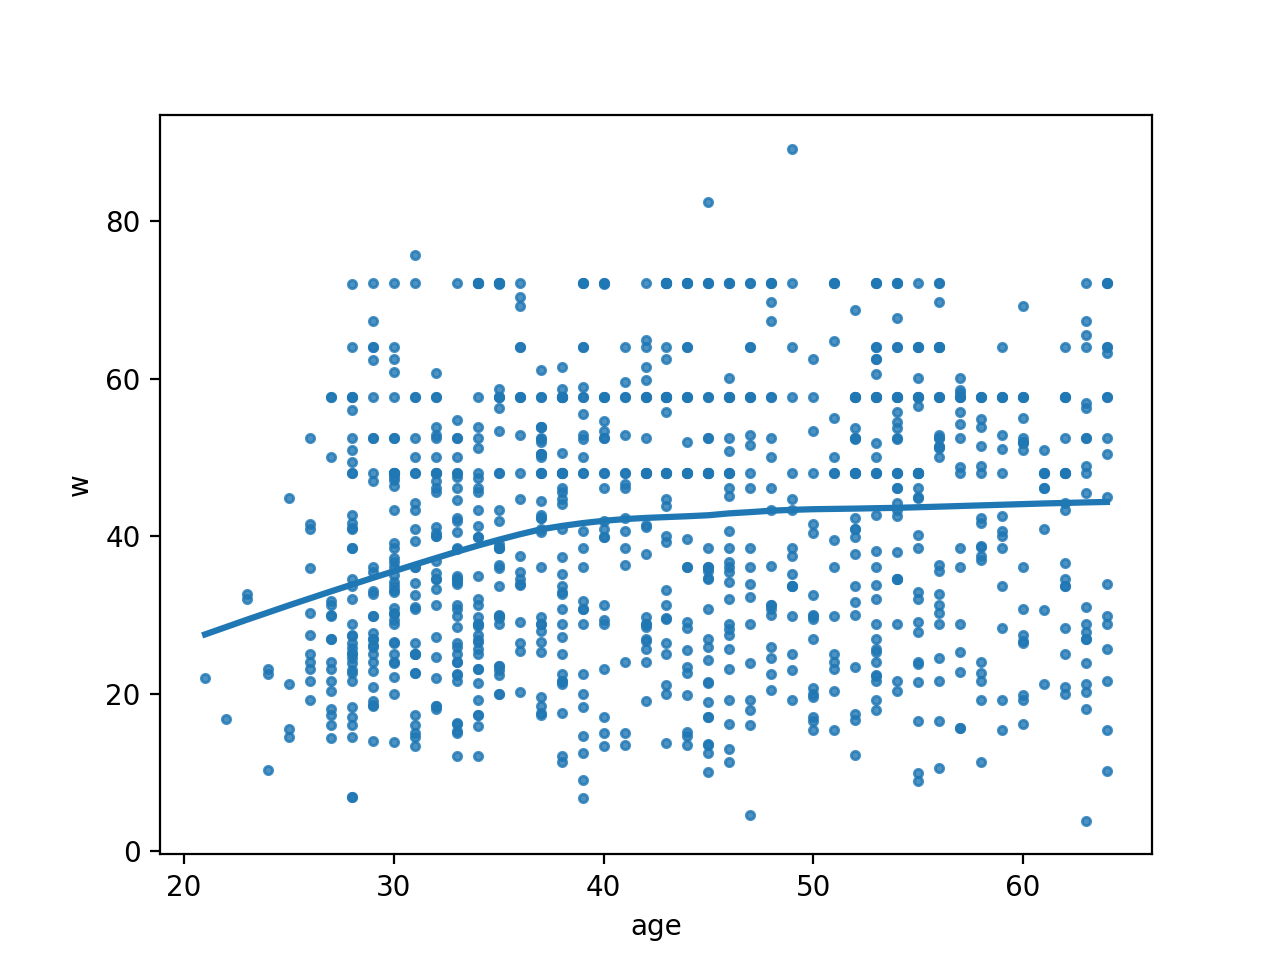

In [45]:
sns.regplot(
    data = data,
    x = 'age', y = 'w', 
    marker= '.',
    fit_reg= True, lowess= True);

## Linear regression

In [46]:
lowess = sm.nonparametric.lowess
y_hat_lowess = lowess(data.w, data.age)

In [47]:
y_hat_lowess[0:10]

array([[21.        , 27.51339232],
       [22.        , 28.45615942],
       [23.        , 29.3869748 ],
       [23.        , 29.3869748 ],
       [24.        , 30.30512975],
       [24.        , 30.30512975],
       [24.        , 30.30512975],
       [25.        , 31.20989922],
       [25.        , 31.20989922],
       [25.        , 31.20989922]])

In [48]:
y_hat_lowess = [x[1] for x in y_hat_lowess]
y_hat_lowess[0:10]

[27.513392321841852,
 28.456159418537464,
 29.38697480071503,
 29.38697480071503,
 30.305129747598478,
 30.305129747598478,
 30.305129747598478,
 31.209899215436817,
 31.209899215436817,
 31.209899215436817]

### Models

In [49]:
reg1 = smf.ols("w ~ age + agesq", data=data).fit(cov_type="HC1")

In [50]:
print(reg1.get_robustcov_results(cov_type='HC1').summary())

                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     23.53
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.04e-10
Time:                        19:53:45   Log-Likelihood:                -4171.6
No. Observations:                 989   AIC:                             8349.
Df Residuals:                     986   BIC:                             8364.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7814      8.851     -0.314      0.7

In [51]:
reg1.bic

8363.795577562927

In [131]:
reg2 = smf.ols(
    "w ~ age + agesq + female + ed_other + ed_MA + ed_Pro + ed_Phd + white + afram + asian + hisp + othernonw",
    data=data).fit(cov_type="HC0")

reg3 = smf.ols(
    "w ~ age + agesq + female + ed_other + ed_MA + ed_Pro + ed_Phd + white + afram + asian + hisp + othernonw + child0 + child1 + child2 + child3 + child4pl",
    data=data,
).fit(cov_type="HC0")

reg4 = smf.ols(
    "w ~ age + agesq + female + ed_other + ed_MA + ed_Pro + ed_Phd + white + afram + asian + hisp + othernonw + child0 + child1 + child2 + child3 + child4pl + married + divorced + wiwowed + nevermar + nonUSborn + fedgov + stagov + locgov + nonprof + forprof + union",
    data=data,
).fit(cov_type="HC0")
"""
reg5 = smf.ols(
    "w ~ age + agesq + female * age + ed_other * age + ed_MA * age + ed_Pro * age + ed_Phd * age + white * age + afram * age + asian * age + hisp * age + othernonw * age + child0 * age + child1 * age + child2 * age + child3 * age + child4pl * age + married * age + divorced * age + wiwowed * age + nevermar * age + nonUSborn * age + fedgov * age + stagov * age + locgov * age + nonprof * age + forprof * age + union * age",
    data=data,
).fit(cov_type="HC0")
not used as the assignment calls for 4 models
"""

'\nreg5 = smf.ols(\n    "w ~ age + agesq + female * age + ed_other * age + ed_MA * age + ed_Pro * age + ed_Phd * age + white * age + afram * age + asian * age + hisp * age + othernonw * age + child0 * age + child1 * age + child2 * age + child3 * age + child4pl * age + married * age + divorced * age + wiwowed * age + nevermar * age + nonUSborn * age + fedgov * age + stagov * age + locgov * age + nonprof * age + forprof * age + union * age",\n    data=data,\n).fit(cov_type="HC0")\nnot used as the assignment calls for 4 models\n'

In [132]:
models = [reg1, reg2, reg3, reg4]
robustcov_results=[]

for i, model in enumerate(models):
    result=model.get_robustcov_results(cov_type='HC1').summary()
    robustcov_results.append(result)
    print()
    print(f'Regression: reg{i+1}')
    print(result)


Regression: reg1
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     23.53
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.04e-10
Time:                        23:07:53   Log-Likelihood:                -4171.6
No. Observations:                 989   AIC:                             8349.
Df Residuals:                     986   BIC:                             8364.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7814      8.851  

c:\Users\mates\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 11
c:\Users\mates\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 17, but rank is 15
c:\Users\mates\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 25


In [54]:
stargazer.Stargazer([reg1])

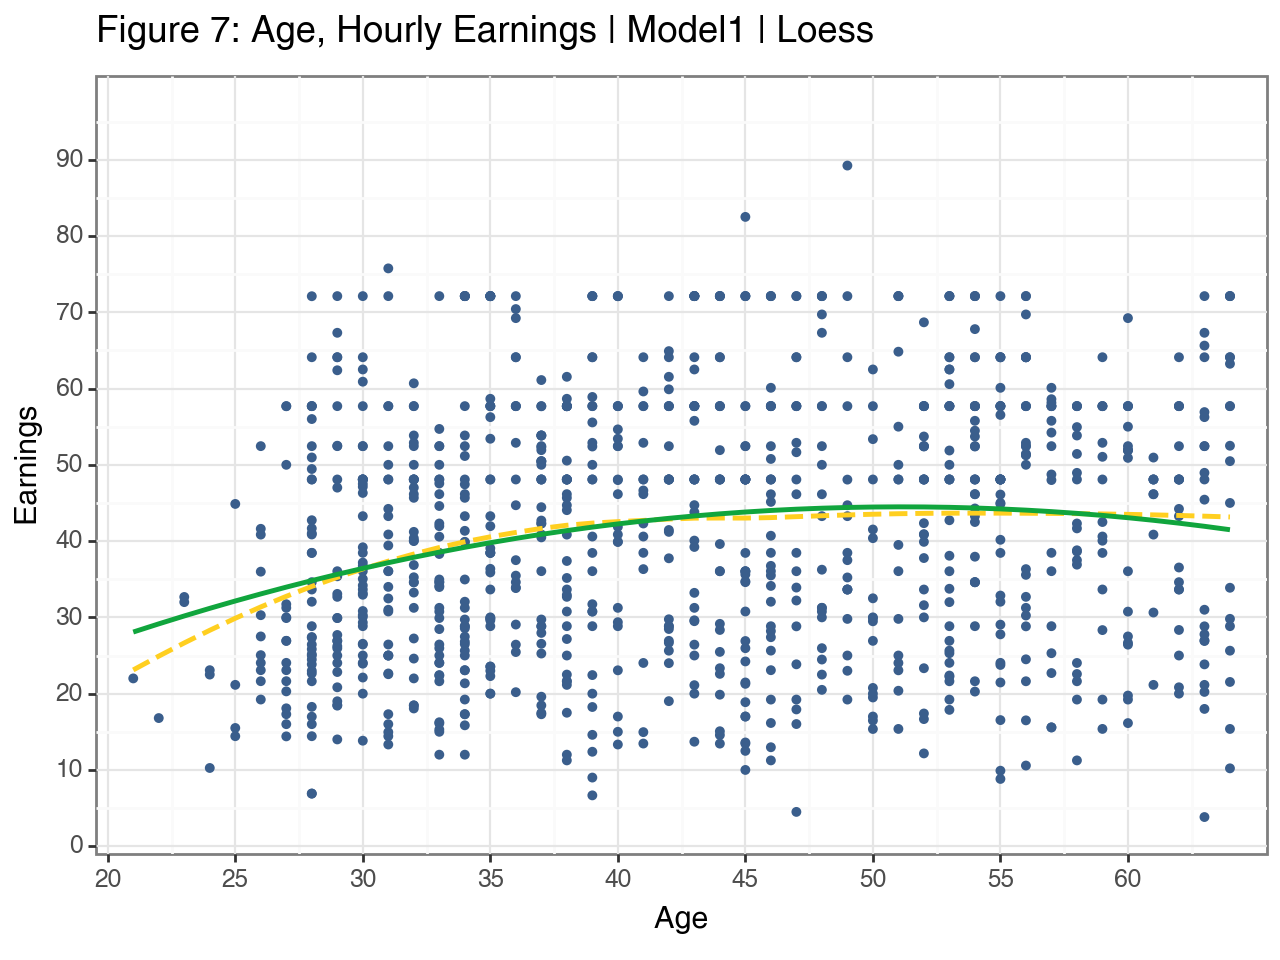

<Figure Size: (640 x 480)>

In [133]:
#lowess with ggplot
ggplot(data, aes(x="age", y="w")) + geom_point(
    color=color[0], size=1, alpha=0.8, show_legend=False, na_rm=True
) + geom_smooth(method="loess", se=False, colour=color[3],linetype="dashed", size=1, span=0.9) + labs(
    x="Age (years)", y="Wage (US dollars)"
) + geom_line(aes(y="reg1.predict()"), colour=color[1], size=1) + labs(
    x="Age (years)", y="Wage (US dollars)"
) + theme_bw() + expand_limits(
    x=0.01, y=0.01
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 100), breaks=seq(0, 100, 10)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(20, 65), breaks=seq(20, 65, 5)
) + labs(x="Age", y="Earnings", title="Figure 7: Age, Hourly Earnings | Model1 | Loess")

In [56]:
bic = [round(x.bic, 2) for x in [reg1,reg2,reg3,reg4]]
sg = stargazer.Stargazer([reg1,reg2,reg3,reg4])
sg.add_line('BIC', bic, location=stargazer.LineLocation.FOOTER_BOTTOM)
sg

c:\Users\mates\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 11
c:\Users\mates\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 17, but rank is 15
c:\Users\mates\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 25


#### Model 2: Linear Regression with cross validation

In [57]:
#get model 1 rmse
rmse(reg1.fittedvalues,data.w)

16.42840200102413

In [58]:
#get model 2 rmse
rmse(reg2.fittedvalues,data.w)

15.697198996606113

In [59]:
#get model 3 rmse
rmse(reg3.fittedvalues,data.w)

15.678170163826007

In [60]:
#get model 4 rmse
rmse(reg4.fittedvalues,data.w)

15.236640111937195

In [87]:
from sklearn.model_selection import KFold
k = KFold(n_splits=5, shuffle=False, random_state=None)

In [88]:
for train_index, test_index in k.split(data):
    print(train_index, '\n', '\n', test_index, '\n')

[198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 44

In [89]:
### Cross validate OLS with combining sklearn k-fold cross validation and statsmodels ols formula


def cv_reg(formula, data, kfold, robustse=None):
    regression_list = []
    predicts_on_test = []
    rsquared = []
    rmse_list = []

    # Calculating OLS for each fold

    for train_index, test_index in k.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)
        data_train, data_test = data.iloc[train_index, :], data.iloc[test_index, :]
        if robustse is None:
            model = smf.ols(formula, data=data_train).fit()
        else:
            model = smf.ols(formula, data=data_train).fit(cov_type=robustse)
        regression_list += [model]
        predicts_on_test += [model.predict(data_test)]
        rsquared += [model.rsquared]
        rmse_list += [rmse(data_train[formula.split("~")[0]], model.predict())]

    return {
        "regressions": regression_list,
        "test_predict": predicts_on_test,
        "r2": rsquared,
        "rmse": rmse_list,
    }


def summarize_cv(cvlist, stat="rmse"):
    result = pd.DataFrame(
        {"Model" + str(x + 1): cvlist[x][stat] for x in range(len(cv_list))}
    )
    result["Resample"] = ["Fold" + str(x + 1) for x in range(len(cvlist[0]["rmse"]))]
    result = result.set_index("Resample")
    result = pd.concat([result, pd.DataFrame(result.mean(), columns=["Average"]).T])
    return result

In [90]:
cv1 = cv_reg("w~age+agesq + female", data, k, "HC0")
cv2 = cv_reg(
    "w~age+agesq + ed_other + ed_MA + ed_Pro + ed_Phd + white + afram + asian + hisp + othernonw",
    data,
    k,
    "HC0",
)
cv3 = cv_reg(
    "w~age+agesq + ed_other + ed_MA + ed_Pro + ed_Phd + white + afram + asian + hisp + othernonw + child0 + child1 + child2 + child3 + child4pl",
    data,
    k,
    "HC0",
)
cv4 = cv_reg(
    "w~age+agesq + ed_other + ed_MA + ed_Pro + ed_Phd + white + afram + asian + hisp + othernonw + child0 + child1 + child2 + child3 + child4pl + married + divorced + wiwowed + nevermar + nonUSborn + fedgov + stagov + locgov + nonprof + forprof + union",
    data,
    k,
    "HC0",
)
"""
cv5 = cv_reg(
    "w~age+agesq + female * age + ed_other * age + ed_MA * age + ed_Pro * age + ed_Phd * age + white * age + afram * age + asian * age + hisp * age + othernonw * age + child0 * age + child1 * age + child2 * age + child3 * age + child4pl * age + married * age + divorced * age + wiwowed * age + nevermar * age + nonUSborn * age + fedgov * age + stagov * age + locgov * age + nonprof * age + forprof * age + union * age",
    data,
    k,
    "HC0",
)
"""
cv_list = [cv1, cv2, cv3, cv4]


In [91]:
summarize_cv(cv_list)

,Model1,Model2,Model3,Model4
Fold1,16.708608,16.061545,16.037045,15.601646
Fold2,16.439893,15.854508,15.830486,15.366008
Fold3,15.925247,15.492489,15.474431,15.074837
Fold4,16.139987,15.541313,15.525615,15.046968
Fold5,16.348058,15.768682,15.732001,15.116191
Average,16.312359,15.743707,15.719916,15.241130


In [134]:
average_cv = summarize_cv(cv_list).loc["Average", :]

## Visual aid for documentation

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data - Replace these with your actual values
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
bic_values = [reg1.bic, reg2.bic, reg3.bic, reg4.bic] 
full_data_rmse = [rmse(reg1.fittedvalues,data.w), rmse(reg2.fittedvalues,data.w), rmse(reg3.fittedvalues,data.w), rmse(reg4.fittedvalues,data.w)]  
cross_validated_rmse = [average_cv['Model1'], average_cv['Model2'], average_cv['Model3'], average_cv['Model4']]

# Creating a DataFrame
df = pd.DataFrame({
    'Model': model_names,
    'BIC': bic_values,
    'Full Data RMSE': full_data_rmse,
    'Cross Validated RMSE': cross_validated_rmse
})

# Display the DataFrame
print(df)

     Model          BIC  Full Data RMSE  Cross Validated RMSE
0  Model 1  8363.795578       16.428402             16.312359
1  Model 2  8335.808717       15.697199             15.743707
2  Model 3  8360.996222       15.678170             15.719916
3  Model 4  8373.459126       15.236640             15.241130


In [126]:
df

,Model,BIC,Full Data RMSE,Cross Validated RMSE
0,Model 1,8363.795578,16.428402,16.312359
1,Model 2,8335.808717,15.697199,15.743707
2,Model 3,8360.996222,15.678170,15.719916
3,Model 4,8373.459126,15.236640,15.241130


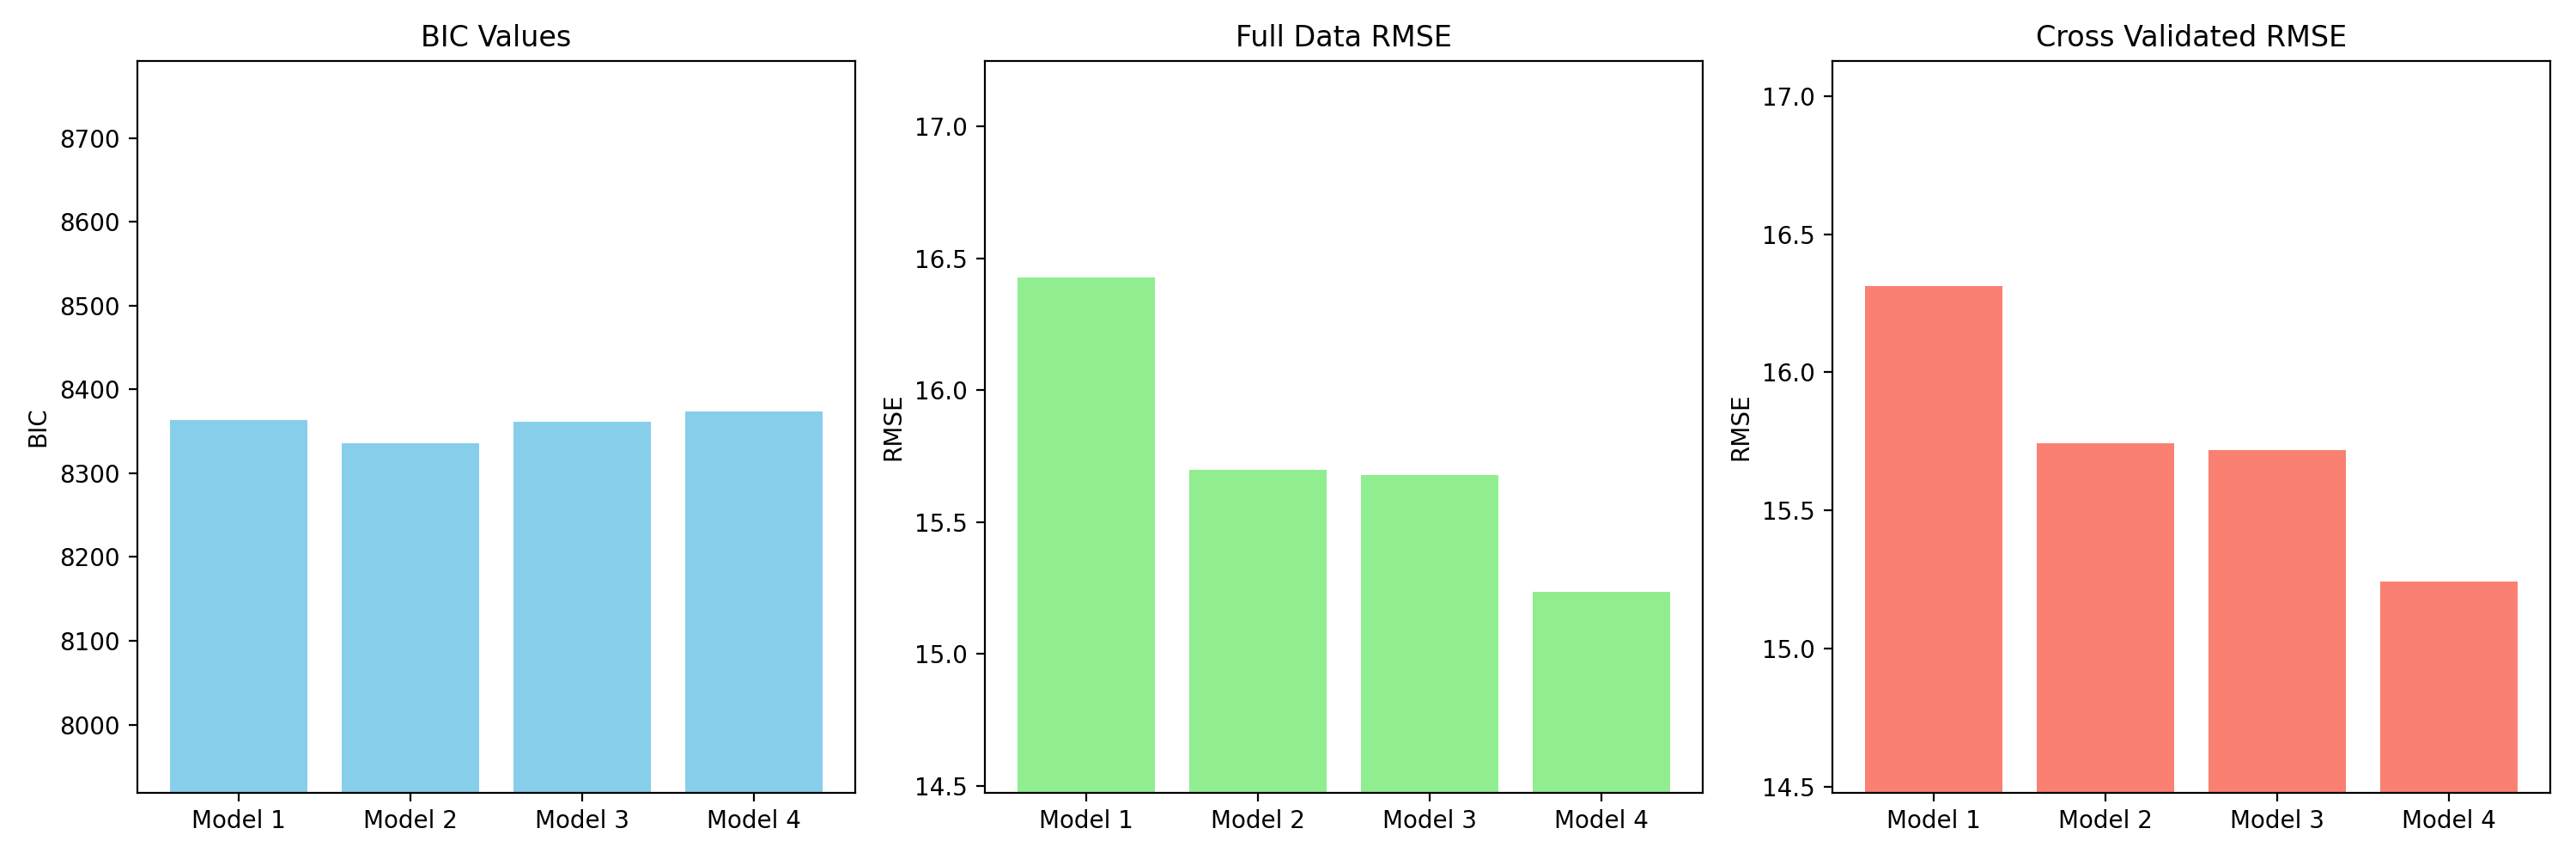

In [99]:
# Creating bar charts
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Function to set axis limits focusing on the top part of the bars
def set_axis_limits(ax, values, buffer=0.05):
    upper_limit = max(values) * (1 + buffer)
    lower_limit = min(values) * (1 - buffer)
    ax.set_ylim(lower_limit, upper_limit)

# BIC Values Bar Chart
axes[0].bar(df['Model'], df['BIC'], color='skyblue')
axes[0].set_title('BIC Values')
axes[0].set_ylabel('BIC')
set_axis_limits(axes[0], bic_values)

# Full Data RMSE Bar Chart
axes[1].bar(df['Model'], df['Full Data RMSE'], color='lightgreen')
axes[1].set_title('Full Data RMSE')
axes[1].set_ylabel('RMSE')
set_axis_limits(axes[1], full_data_rmse)

# Cross Validated RMSE Bar Chart
axes[2].bar(df['Model'], df['Cross Validated RMSE'], color='salmon')
axes[2].set_title('Cross Validated RMSE')
axes[2].set_ylabel('RMSE')
set_axis_limits(axes[2], cross_validated_rmse)

# Adjusting layout
plt.tight_layout()
plt.show()